In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [3]:
df = pd.read_json('../data/article-counts.json/part-00000-e9025afa-4baa-4b54-9a88-6ff25697c35f-c000.json.gz', lines=True)

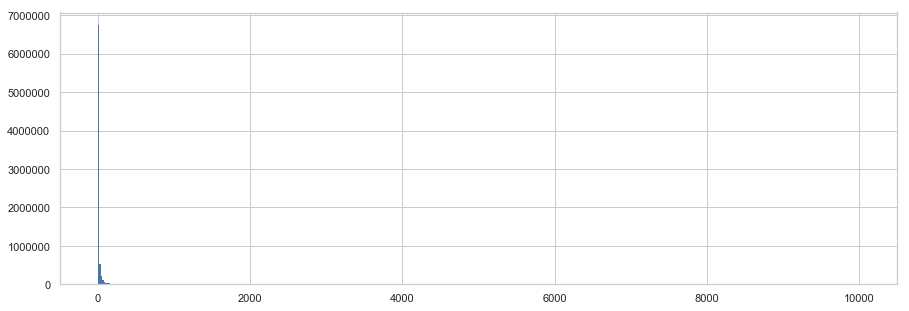

In [95]:
plt.figure(figsize=(15,5))
_ = plt.hist(df[df['count'] < 10000]['count'], bins=500, linewidth=0)

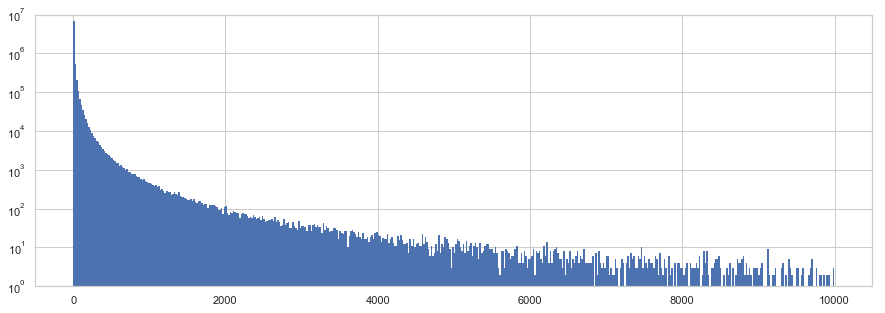

In [96]:
plt.figure(figsize=(15,5))
plt.yscale('log')
plt.ylim(1, 1e7)
_ = plt.hist(df[df['count'] < 10000]['count'], bins=500, linewidth=0)

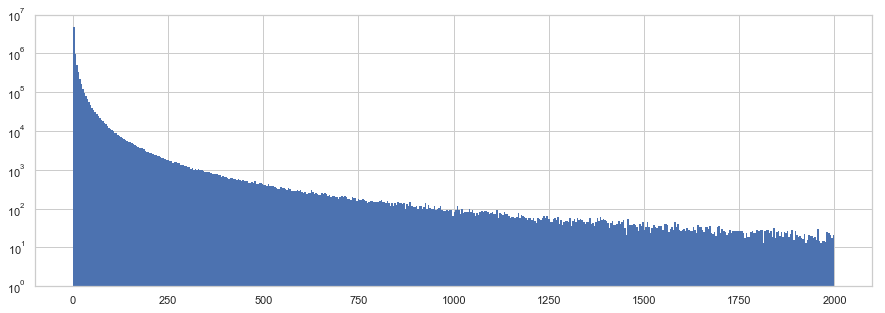

In [38]:
plt.figure(figsize=(15,5))
plt.yscale('log')
plt.ylim(1, 1e7)
_ = plt.hist(df[df['count'] < 2000]['count'], bins=500, linewidth=0)

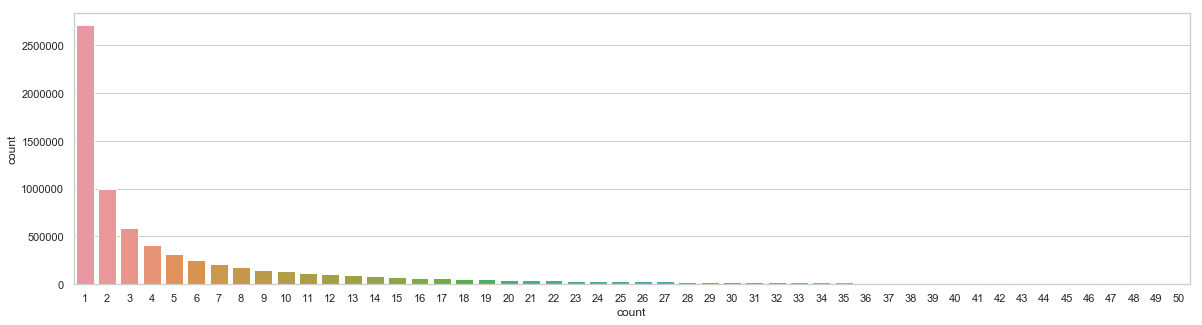

In [41]:
plt.figure(figsize=(20,5))
sns.countplot(x='count', data=df[df['count'] <= 50])

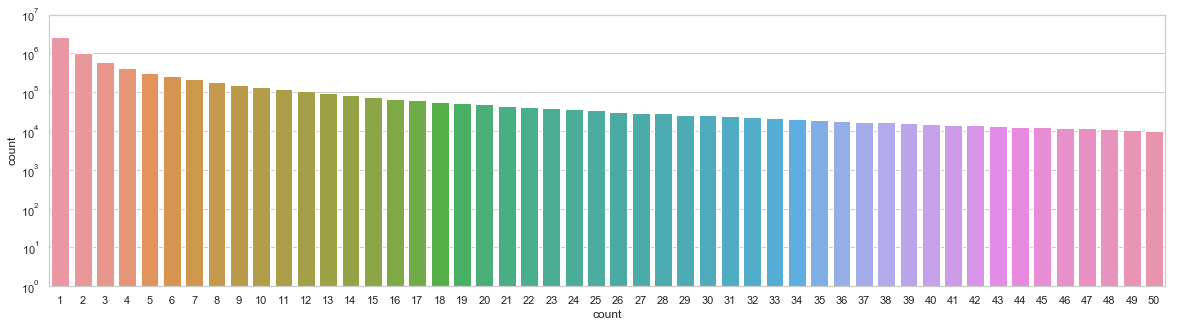

In [42]:
plt.figure(figsize=(20,5))
plt.yscale('log')
plt.ylim(1, 1e7)
sns.countplot(x='count', data=df[df['count'] <= 50])

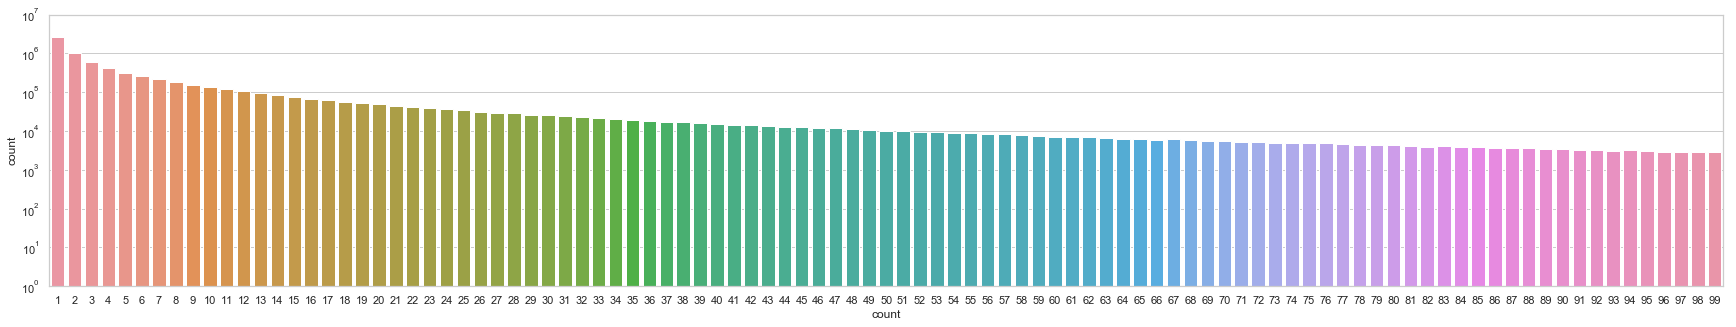

In [40]:
plt.figure(figsize=(30,5))
plt.yscale('log')
plt.ylim(1, 1e7)
sns.countplot(x='count', data=df[df['count'] < 100])

In [29]:
df['count'].mean()

22.0325231126779

In [27]:
df['count'].std()

199.8508201611101

In [30]:
df[df.domain=='nytimes.com']['count'].mean()

46.98405093893117

In [31]:
df[df.domain=='nytimes.com']['count'].std()

328.89057547287933

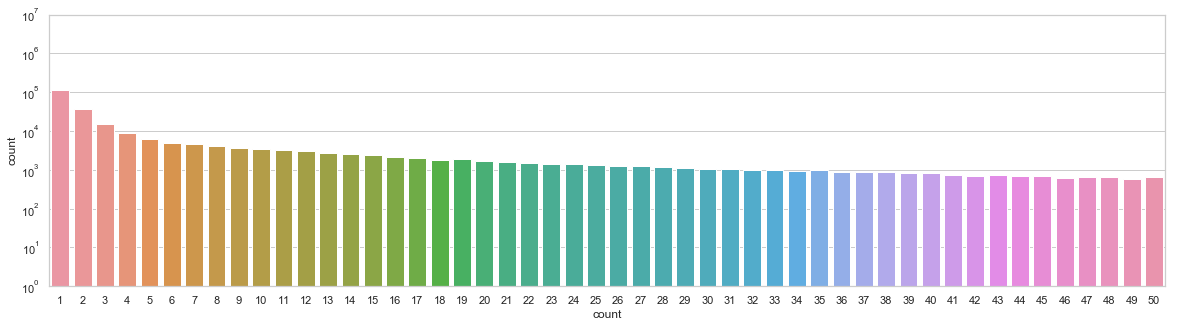

In [65]:
plt.figure(figsize=(20,5))
plt.yscale('log')
plt.ylim(1, 1e7)
sns.countplot(x='count', data=df[(df['count'] <= 50) & (df.domain=='nytimes.com')])

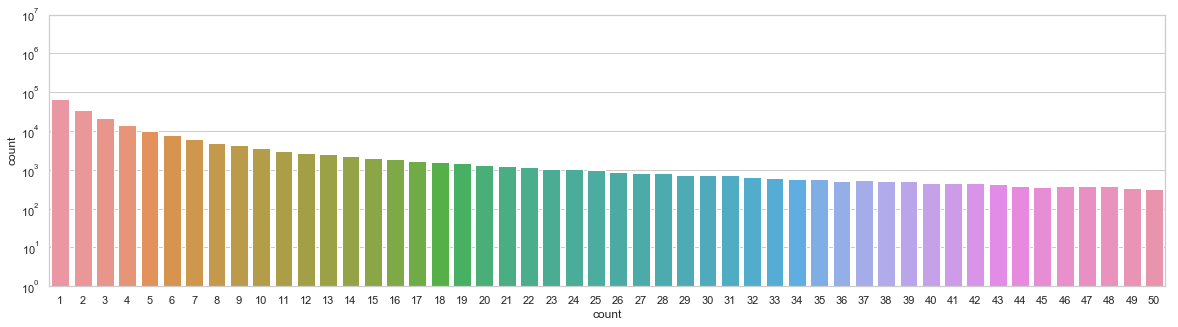

In [66]:
plt.figure(figsize=(20,5))
plt.yscale('log')
plt.ylim(1, 1e7)
sns.countplot(x='count', data=df[(df['count'] <= 50) & (df.domain=='foxnews.com')])

In [69]:
nyt = df[df.domain=='nytimes.com']

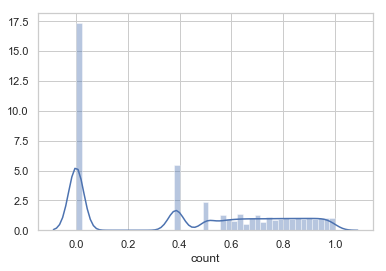

In [84]:
sns.distplot(nyt['count'].rank(method='min', pct=True))

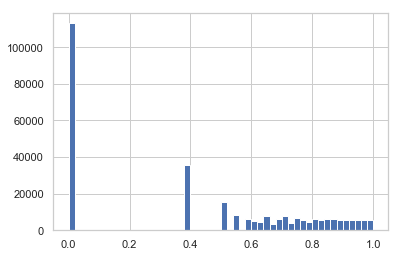

In [222]:
_ = plt.hist(nyt['count'].rank(method='min', pct=True), bins=50)

In [139]:
counts = np.array(nyt['count'].sort_values(ascending=False))

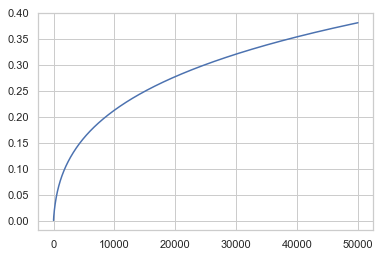

In [161]:
counts = np.array(df['count'].sort_values(ascending=False))
plt.plot(np.cumsum(counts / counts.sum())[:50000])

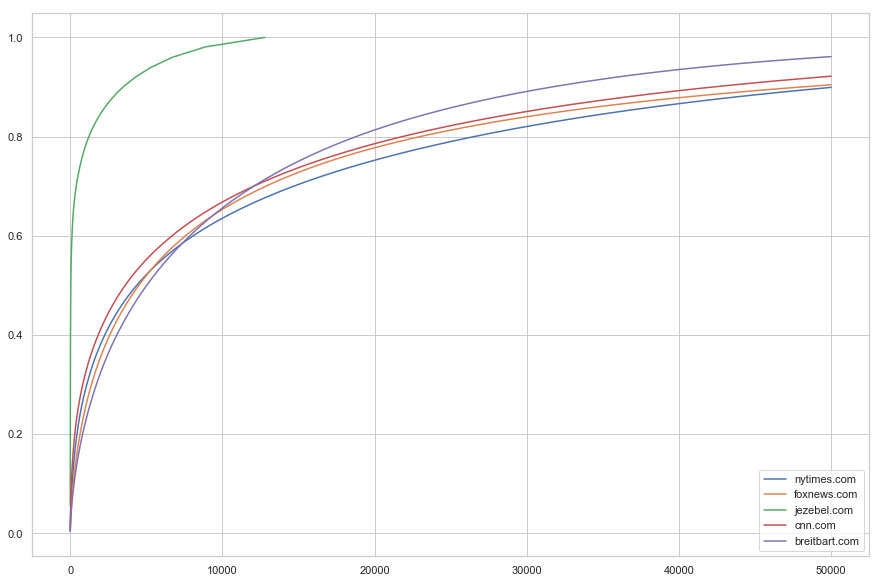

In [157]:
plt.figure(figsize=(15,10))

for d in ('nytimes.com', 'foxnews.com', 'jezebel.com', 'cnn.com', 'breitbart.com'):
    counts = np.array(df[df.domain==d]['count'].sort_values(ascending=False))
    plt.plot(np.cumsum(counts / counts.sum())[:50000], label=d)
    
plt.legend()

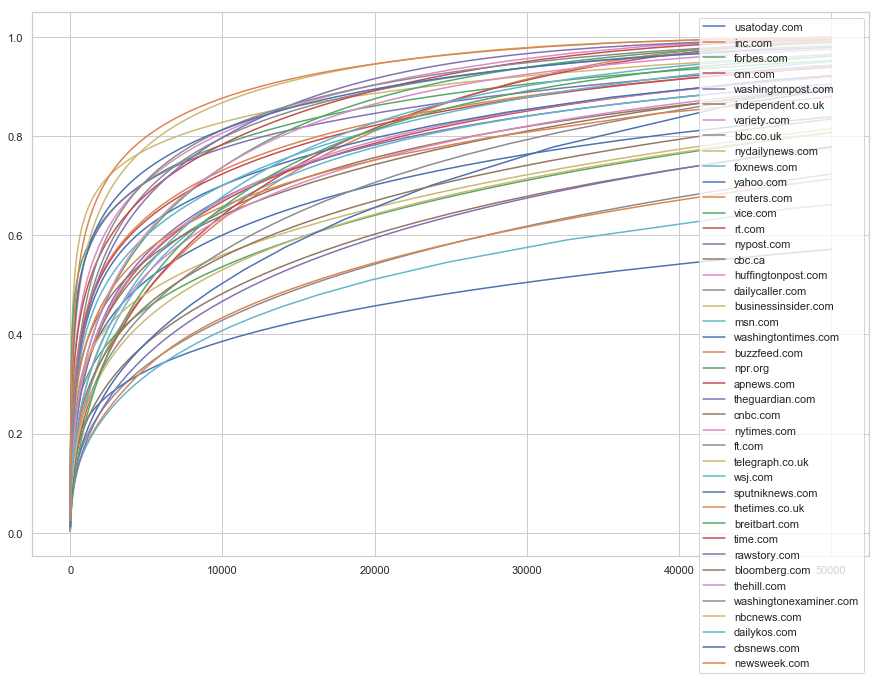

In [160]:
plt.figure(figsize=(15,10))

for d in df.domain.unique():
    counts = np.array(df[df.domain==d]['count'].sort_values(ascending=False))
    if len(counts) > 50000:
        plt.plot(np.cumsum(counts / counts.sum())[:50000], label=d)
    
plt.legend()

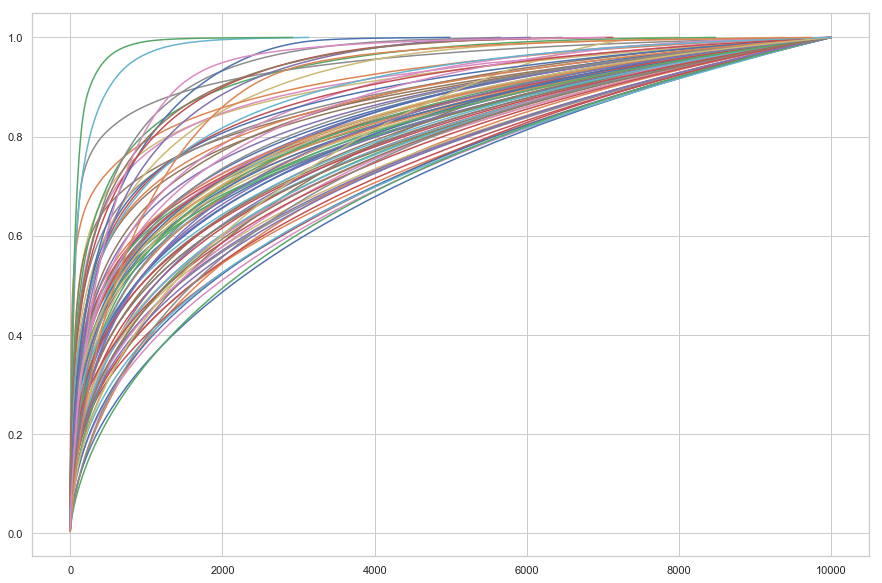

In [181]:
plt.figure(figsize=(15,10))

for d in df.domain.unique():
    counts = np.array(df[df.domain==d]['count'].sort_values(ascending=False))[:10000]
    plt.plot(np.cumsum(counts / counts.sum()), label=d)

In [183]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
plt.figure(figsize=(15,10))

for d in ('nytimes.com', 'foxnews.com', 'jezebel.com', 'cnn.com', 'breitbart.com'):
    counts = np.array(df[df.domain==d]['count'].sort_values(ascending=False))[:10000]
    plt.plot(np.cumsum(counts / counts.sum()), label=d)
    
plt.legend()

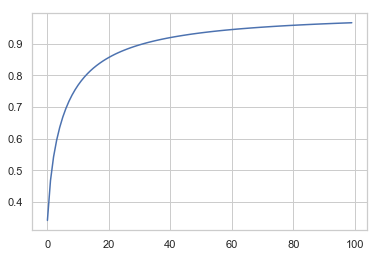

In [171]:
counts = np.array(df.groupby('count').count().article_id)
plt.plot(np.cumsum(counts / counts.sum())[:100])

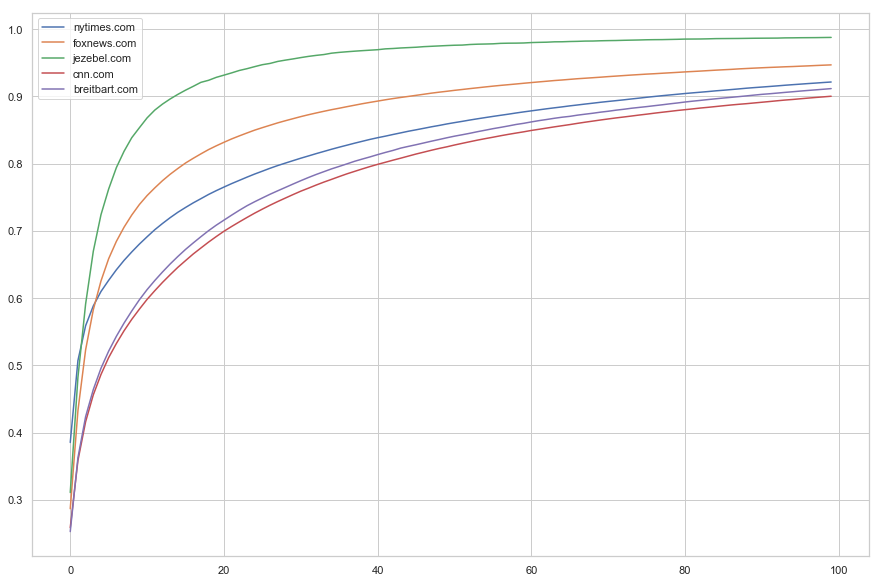

In [174]:
plt.figure(figsize=(15,10))

for d in ('nytimes.com', 'foxnews.com', 'jezebel.com', 'cnn.com', 'breitbart.com'):
    counts = np.array(df[df.domain==d].groupby('count').count().article_id)
    plt.plot(np.cumsum(counts / counts.sum())[:100], label=d)
    
plt.legend()

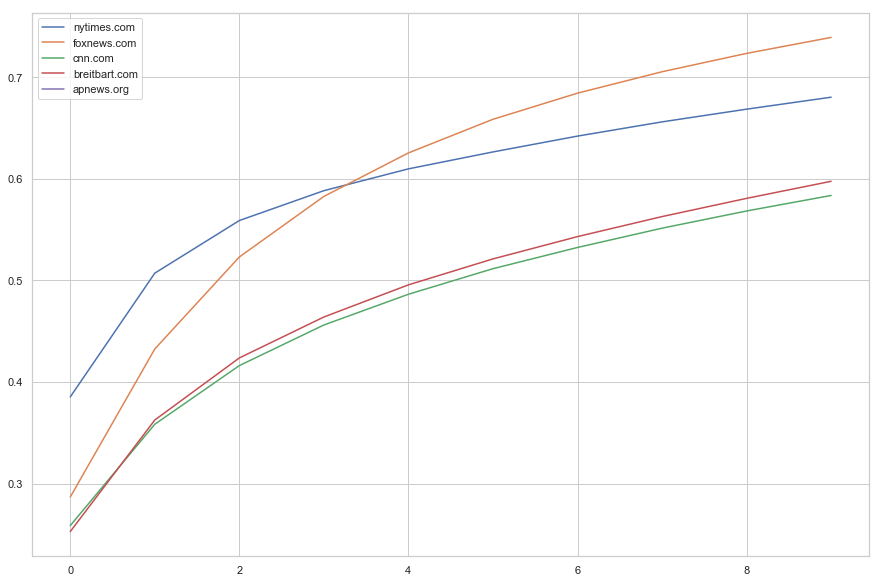

In [196]:
plt.figure(figsize=(15,10))

for d in ('nytimes.com', 'foxnews.com', 'cnn.com', 'breitbart.com', 'apnews.org'):
    counts = np.array(df[df.domain==d].groupby('count').count().article_id)
    plt.plot(np.cumsum(counts / counts.sum())[:10], label=d)
    
plt.legend()

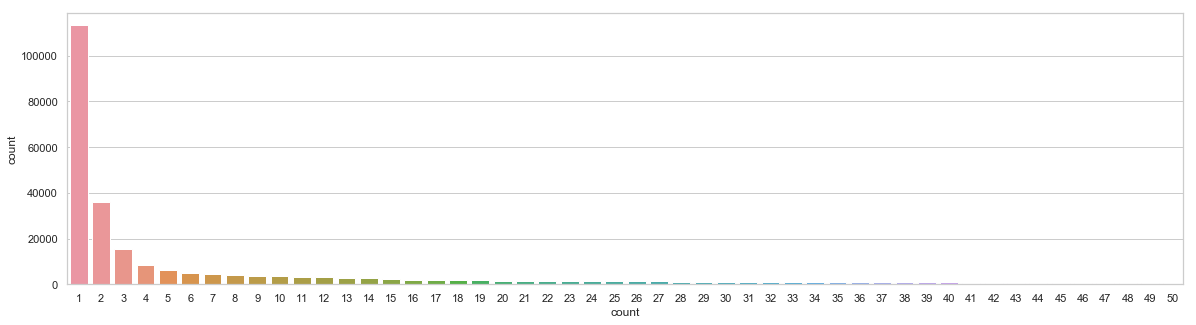

In [199]:
plt.figure(figsize=(20,5))
sns.countplot(x='count', data=df[(df['count'] <= 50) & (df.domain=='nytimes.com')])

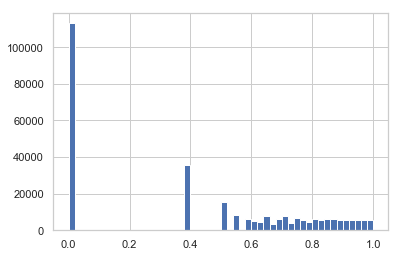

In [221]:
_ = plt.hist(nyt['count'].rank(method='min', pct=True), bins=50)

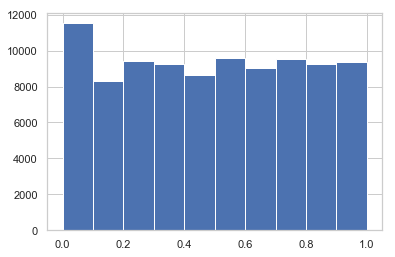

In [225]:
_ = plt.hist(nyt[nyt['count'] > 10]['count'].rank(method='min', pct=True), bins=10)

In [11]:
len(df[df['count'] >= 10])

2074671

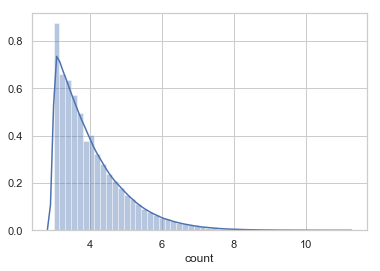

In [15]:
sns.distplot(np.log(df[df['count'] >= 20]['count']))